In [2]:
print("Tarea 5 Proyecto Análisis de Datos")

Tarea 5 Proyecto Análisis de Datos


In [4]:
# Realizamos el cargue de las librerias para comnezar con el trabajo.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
#Hacemos el cargue del Dataset del Titanic.

In [18]:
archivo=pd.read_csv(filepath_or_buffer="Titanic-Dataset.csv")

In [20]:
archivo.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
#Realizamos la descripción de los datos.

In [24]:
archivo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
archivo.shape

(891, 12)

In [30]:
#Ahora realizamos la identificación de los datos, para encontrar los valores atípicos en cada fila.

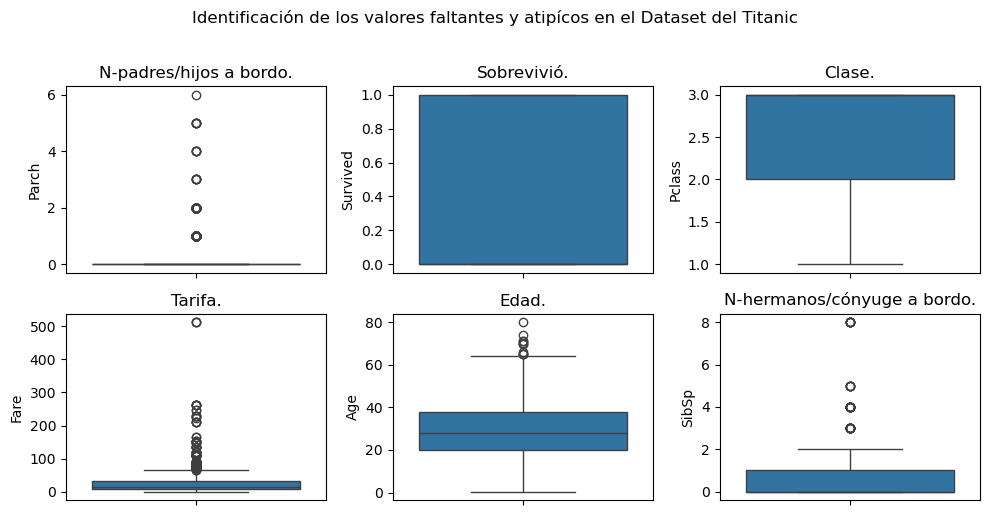

In [32]:
fig, axs = plt.subplots(2,3, figsize =(10,5))
plt1 = sns.boxplot(archivo['Parch'], ax = axs[0,0]).set_title('N-padres/hijos a bordo.')
plt2 = sns.boxplot(archivo['Survived'], ax = axs[0,1]).set_title('Sobrevivió.')
plt3 = sns.boxplot(archivo['Pclass'], ax = axs[0,2]).set_title('Clase.')
plt1 = sns.boxplot(archivo['Fare'], ax = axs[1,0]).set_title('Tarifa.')
plt2 = sns.boxplot(archivo['Age'], ax = axs[1,1]).set_title('Edad.')
plt3 = sns.boxplot(archivo['SibSp'], ax = axs[1,2]).set_title('N-hermanos/cónyuge a bordo.')
fig.suptitle('Identificación de los valores faltantes y atipícos en el Dataset del Titanic', y=1.02)
plt.tight_layout()
plt.show()

In [34]:
#Preprocesamos los datos, para limpiarlos y tratar los valores faltantes segun sea lo necesario

In [38]:
#Revisamos si hay datos faltantes

In [40]:
print("Cantidad de Clase que estan en cero: ",archivo['Pclass'].isin([0]).sum())
print("Cantidad de Género que estan en cero: ",archivo['Sex'].isin([0]).sum())
print("Cantidad de Edad que estan en cero: ",archivo['Age'].isin([0]).sum())
print("Cantidad de Boleto que estan en cero: ",archivo['Ticket'].isin([0]).sum())
print("Cantidad de Tarifa del pasajero que estan en cero: ",archivo['Fare'].isin([0]).sum())
print("Cantidad de Cabinas que estan en cero: ",archivo['Cabin'].isin([0]).sum())
print("Cantidad de Embarcados que estan en cero: ",archivo['Embarked'].isin([0]).sum())
print("Cantidad de Nombres que estan en cero: ",archivo['Name'].isin([0]).sum())

Cantidad de Clase que estan en cero:  0
Cantidad de Género que estan en cero:  0
Cantidad de Edad que estan en cero:  0
Cantidad de Boleto que estan en cero:  0
Cantidad de Tarifa del pasajero que estan en cero:  15
Cantidad de Cabinas que estan en cero:  0
Cantidad de Embarcados que estan en cero:  0
Cantidad de Nombres que estan en cero:  0


In [42]:
#Reemplazamos todos los ceros con el valor promedio de la columna

In [44]:
archivo['Fare']=archivo['Fare'].replace(0,archivo['Fare'].mean())

In [46]:
#Revisamos de nuevo los datos faltantes

In [48]:
print("Cantidad de Tarifa del pasajero que estan en cero: ",archivo['Fare'].isin([0]).sum())

Cantidad de Tarifa del pasajero que estan en cero:  0


In [50]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
# Miramos que todavia tenemos valores faltantes, por lo cual vamos a rellenar estos valores

In [54]:
pd.isnull(archivo["Age"]).values.ravel().sum()

177

In [56]:
col=archivo["Age"].fillna(archivo["Age"].mean())
col = col.astype(int)
col.head(12)

0     22
1     38
2     26
3     35
4     35
5     29
6     54
7      2
8     27
9     14
10     4
11    58
Name: Age, dtype: int32

In [58]:
#Ahora que ya tenemos rellenados esta columna y no existe valores faltantes, agregamos esta columna al dataset

In [60]:
archivo["New_Age"]=col

In [62]:
archivo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35


In [64]:
#Borramos la columna existente.

In [66]:
archivo=archivo[["PassengerId","Survived","Pclass","Name","Sex","New_Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]]
archivo.head(12)

,PassengerId,Survived,Pclass,Name,Sex,New_Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [68]:
#Ahora vamos a convertir la variable Sex en una varibale Númerica

In [70]:
sex={'male':1, 'female':0}

In [72]:
archivo['Sex']=archivo['Sex'].map(sex)
archivo

,PassengerId,Survived,Pclass,Name,Sex,New_Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,C


In [74]:
# Reemplazar los valores NaN en la columna "Cabin".

In [78]:
archivo["Cabin"].fillna("C123", inplace=True)

In [80]:
print(archivo["Cabin"])

0      C123
1       C85
2      C123
3      C123
4      C123
       ... 
886    C123
887     B42
888    C123
889    C148
890    C123
Name: Cabin, Length: 891, dtype: object


In [82]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   New_Age      891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 80.2+ KB


In [84]:
archivo.describe()

,PassengerId,Survived,Pclass,Sex,New_Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.544332,0.523008,0.381594,32.746366
std,257.353842,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,49.514272
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,15.100000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,32.204208
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
#Identificamos datos atípicos

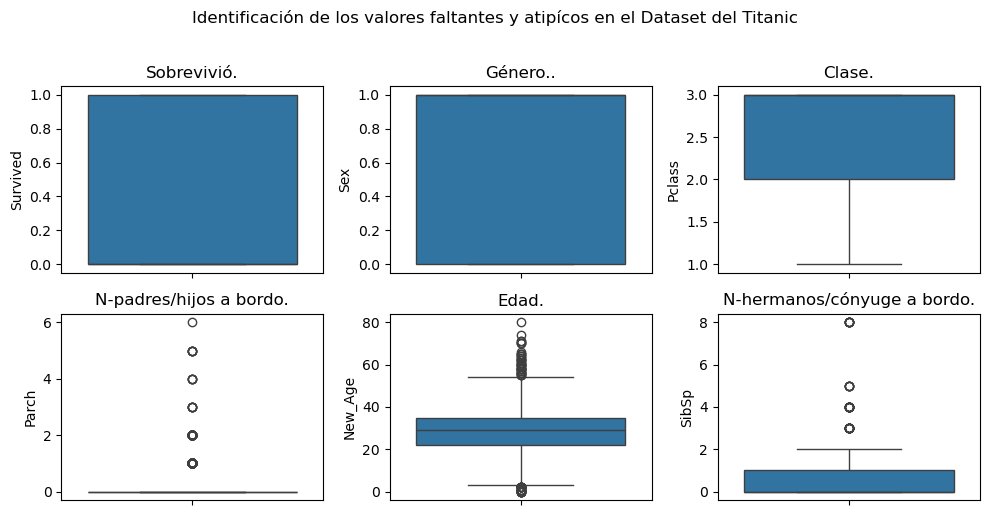

In [88]:
fig, axs = plt.subplots(2,3, figsize =(10,5))
plt1 = sns.boxplot(archivo['Survived'], ax = axs[0,0]).set_title('Sobrevivió.')
plt2 = sns.boxplot(archivo['Sex'], ax = axs[0,1]).set_title('Género..')
plt3 = sns.boxplot(archivo['Pclass'], ax = axs[0,2]).set_title('Clase.')
plt1 = sns.boxplot(archivo['Parch'], ax = axs[1,0]).set_title('N-padres/hijos a bordo.')
plt2 = sns.boxplot(archivo['New_Age'], ax = axs[1,1]).set_title('Edad.')
plt3 = sns.boxplot(archivo['SibSp'], ax = axs[1,2]).set_title('N-hermanos/cónyuge a bordo.')
fig.suptitle('Identificación de los valores faltantes y atipícos en el Dataset del Titanic', y=1.02)
plt.tight_layout()
plt.show()

In [90]:
#Conteo de datos atípicos

In [92]:
nivel_minimo=1
nivel_maximo=105
Total_Atipicos=((archivo['New_Age']<nivel_minimo)|(archivo['New_Age']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 7


In [94]:
#Filtramos los datos atipícos

In [96]:
archivo=archivo[(archivo['New_Age']<nivel_maximo)&(archivo['New_Age']>nivel_minimo)]

In [98]:
# Verificamos si se removieron los datos atpícos

In [100]:
Total_Atipicos=((archivo['New_Age']<nivel_minimo)|(archivo['New_Age']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [102]:
#Checamos
archivo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  877 non-null    int64  
 1   Survived     877 non-null    int64  
 2   Pclass       877 non-null    int64  
 3   Name         877 non-null    object 
 4   Sex          877 non-null    int64  
 5   New_Age      877 non-null    int32  
 6   SibSp        877 non-null    int64  
 7   Parch        877 non-null    int64  
 8   Ticket       877 non-null    object 
 9   Fare         877 non-null    float64
 10  Cabin        877 non-null    object 
 11  Embarked     875 non-null    object 
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 85.6+ KB


In [104]:
#Seleccionamos las características más relevantes para entrenar el modelo utilizando seleciión de características

In [106]:
archivo['Survived'].value_counts()

Survived
0    547
1    330
Name: count, dtype: int64

In [108]:
archivo[['Survived']].head(30)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [110]:
#Haremos la división del Dataset en datos train y test para evaluar el modelo.
#Para el train escogeremos el 75% y para el test el 25%, asi escogeremos (x) y (y)

In [112]:
archivo=archivo[["PassengerId","Survived","Pclass","Sex","New_Age","SibSp","Parch","Fare"]]

In [114]:
X =archivo.drop('Survived', axis=1) #cargaremos todas las columnas excepto la de sobrevivió
Y =archivo['Survived'] #cargaremos solo la columna de sobrevivió
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [116]:
print(X_train)

     PassengerId  Pclass  Sex  New_Age  SibSp  Parch     Fare
349          350       3    1       42      0      0   8.6625
511          512       3    1       29      0      0   8.0500
192          193       3    0       19      1      0   7.8542
512          513       1    1       36      0      0  26.2875
111          112       3    0       14      1      0  14.4542
..           ...     ...  ...      ...    ...    ...      ...
696          697       3    1       44      0      0   8.0500
873          874       3    1       47      0      0   9.0000
412          413       1    0       33      1      0  90.0000
468          469       3    1       29      0      0   7.7250
224          225       1    1       38      1      0  90.0000

[657 rows x 7 columns]


In [118]:
print(Y_test)

614    0
481    0
291    1
889    1
216    1
      ..
343    0
272    1
359    1
639    0
148    0
Name: Survived, Length: 220, dtype: int64


In [120]:
#Entrenamos el modelo configurando los diferentes hiperparámetros.

In [122]:
Tarea5_Regresion = LogisticRegression(solver ="liblinear")
Tarea5_Regresion.fit (X_train , Y_train)

prediccion = Tarea5_Regresion.predict(X_test)

In [124]:
print(Y_test)

614    0
481    0
291    1
889    1
216    1
      ..
343    0
272    1
359    1
639    0
148    0
Name: Survived, Length: 220, dtype: int64


In [126]:
print (prediccion)

[0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1
 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0]


In [128]:
#Evaluamos el desempeño del modelo en el conjunto de Test con métrica coo presición, recall,F1-score, etc

In [130]:
print (classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       137
           1       0.81      0.70      0.75        83

    accuracy                           0.82       220
   macro avg       0.82      0.80      0.81       220
weighted avg       0.82      0.82      0.82       220



In [132]:
#Realizamos las diferentes gráficas que permitiran visualizar los resultados del modelo

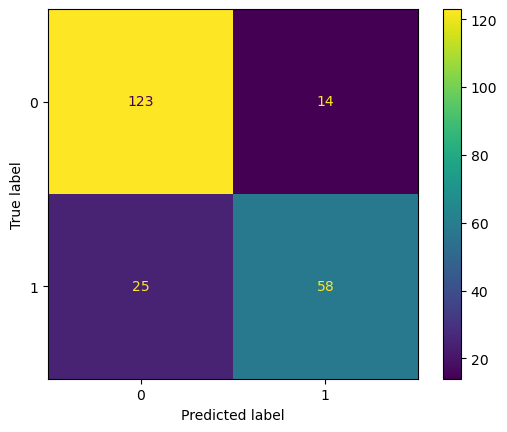

In [134]:
cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

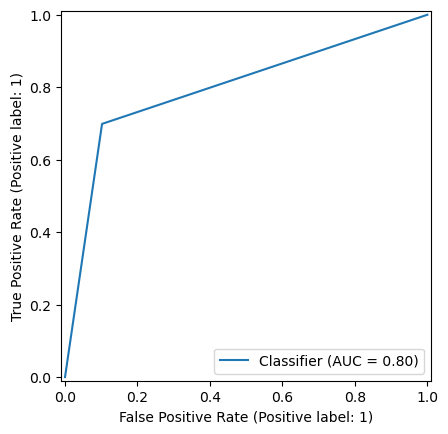

In [136]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test , prediccion)
plt.show()

In [138]:
precision = accuracy_score(Y_test, prediccion)
print("Precision:", precision)

Precision: 0.8227272727272728
